### Check the weighting function - Custom methods and default

In [1]:
from itertools import product

import time
import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersistenceImager

In [2]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

#### The documentaion example!

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


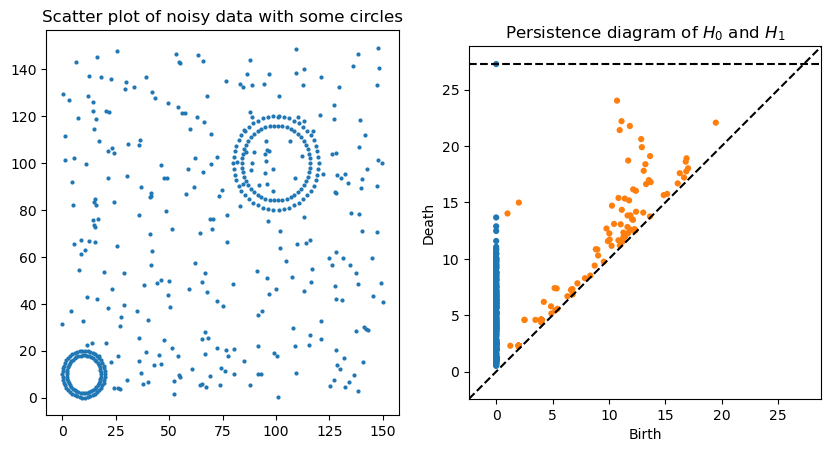

In [3]:
# lots of random noise and 2 circles
data = np.concatenate([150 * np.random.random((300,2)),
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

In [7]:
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

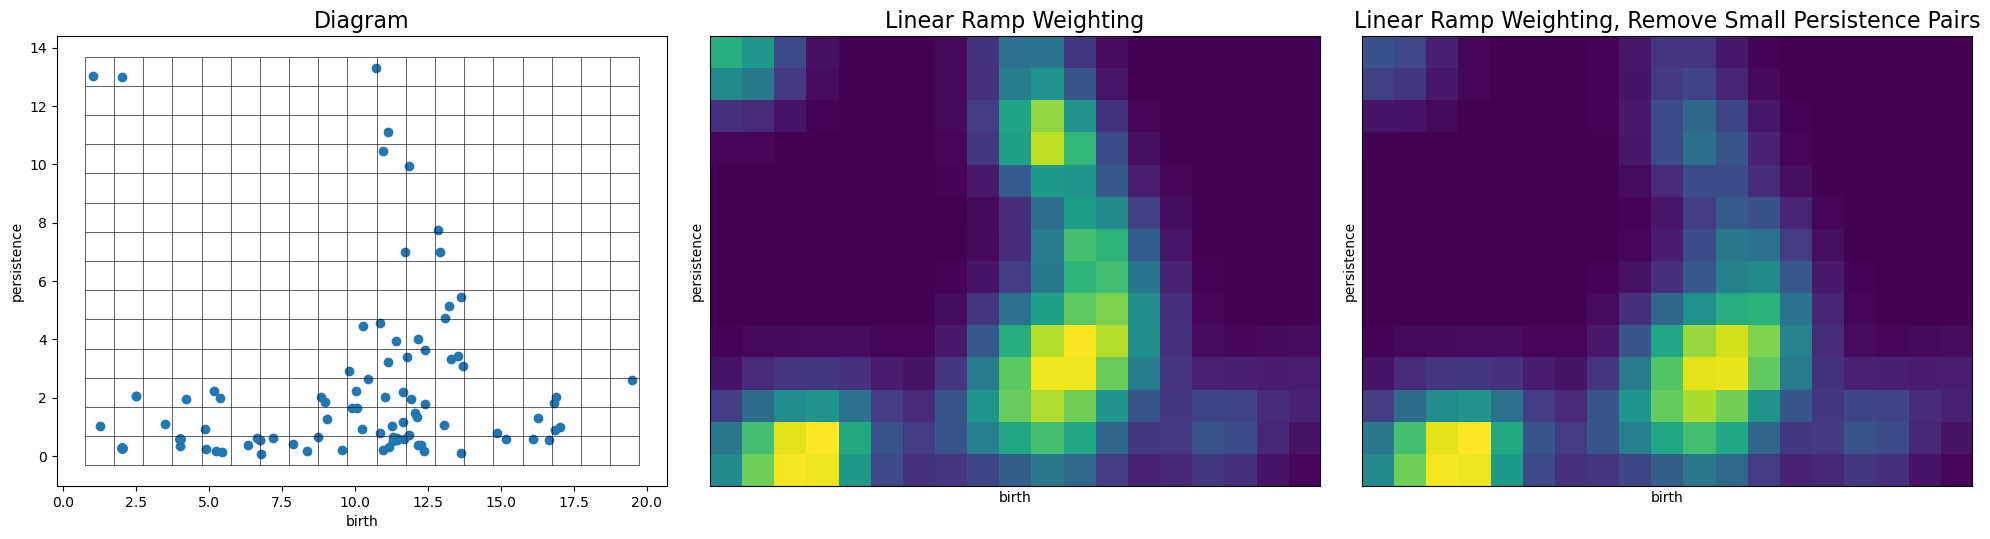

In [11]:
# We first import one of the implemented weighting functions, a peicewise linear ramp
from persim.images_weights import linear_ramp

pimgr.pixel_size = 1
pimgr.weight = linear_ramp
pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':10.0}

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Linear Ramp Weighting', fontsize=16)

pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':4.0}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Linear Ramp Weighting, Remove Small Persistence Pairs', fontsize=16)

plt.tight_layout()
plt.show()

pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':10.0}

Low/High is the weight values and start end is the region that we choose to do the weightning!

In [ ]:
pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':10.0}


#### Custom weight functions

As input to these functions birth, persistence and **kwargs should be used

In [16]:
def custom_weight_function_2(birth, persistence,**kwargs):
    return persistence ** 2

In [17]:
def custom_weight_function_3(birth, persistence,**kwargs):
    for key, value in kwargs.items():
        print(f"{key}: {value}")
    return persistence ** 4

In [18]:
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)
pimgr.pixel_size = 1
pimgr.weight = custom_weight_function_3

pimgr2 = PersistenceImager(pixel_size=1)
pimgr2.fit(H1_dgm)
pimgr2.fit(H1_dgm)
pimgr2.pixel_size = 1
pimgr2.weight = custom_weight_function_2


n: 1.0


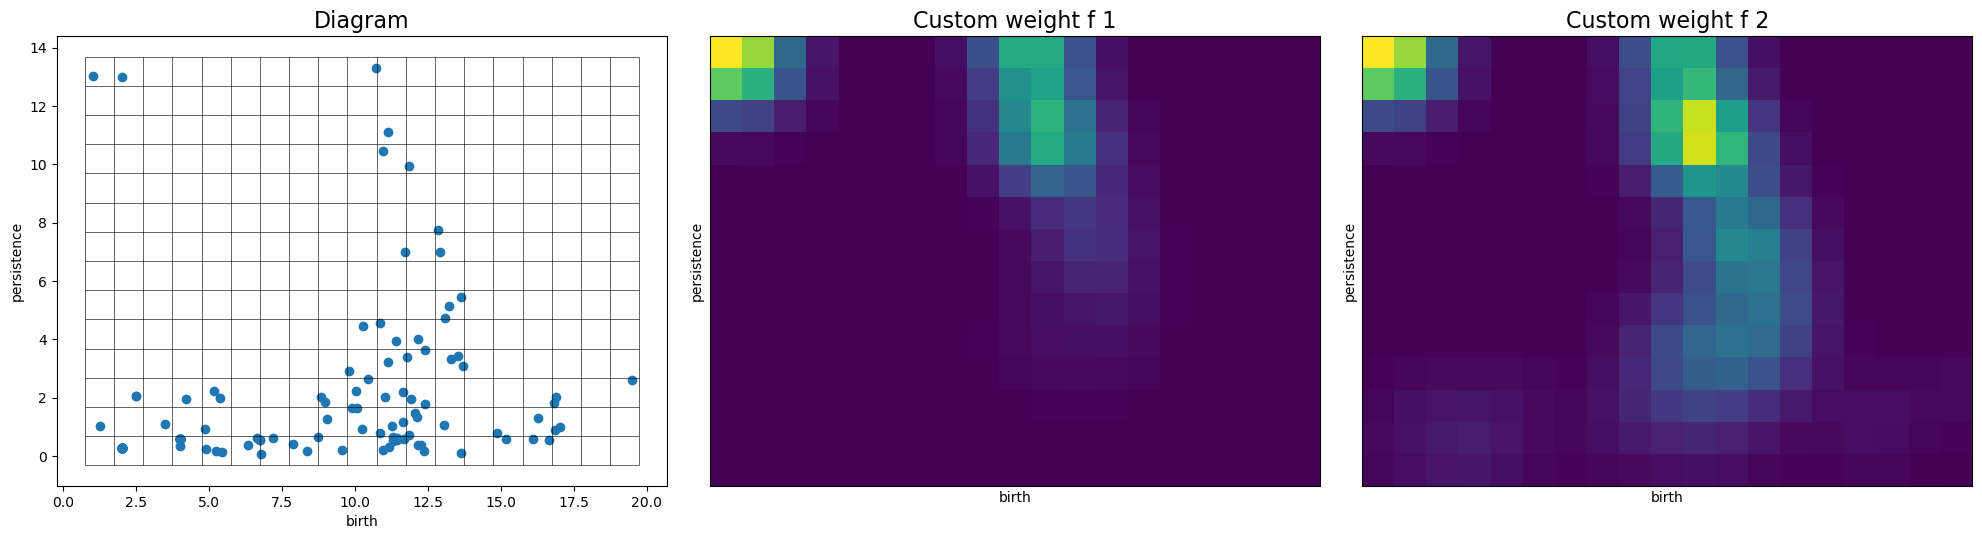

In [19]:


fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm, skew=True), ax=axs[1])
axs[1].set_title('Custom weight f 1', fontsize=16)

pimgr2.plot_image(pimgr2.transform(H1_dgm, skew=True), ax=axs[2])
axs[2].set_title('Custom weight f 2', fontsize=16)

plt.tight_layout()
plt.show()